In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.svm.classes import SVR

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [4]:
#df = pd.read_csv("C:\Users\pedro.matos.castanha\Downloads\COTAHIST_D06012017\COTAHIST_M122016_new.csv", low_memory=False)
#df = pd.read_csv("C:\Users\pedro.matos.castanha\Downloads\COTAHIST_D06012017\COTAHIST_M122016.csv", low_memory=False)
df = pd.read_csv("C:\Users\pedro.matos.castanha\Downloads\COTAHIST_D06012017\COTAHIST_A2016.csv", low_memory=False)
df.head()

,TIPREG,DATA,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,1,20160104,2.0,AAPL34,10,APPLE,DRN,NaN,R$,4150.0,...,5.0,12500.0,52664400.0,0.0,0.0,99991231.0,1.0,0.0,BRAAPLBDR004,115.0
1,1,20160104,96.0,AAPL34F,20,APPLE,DRN,NaN,R$,4211.0,...,3.0,132.0,555588.0,0.0,0.0,99991231.0,1.0,0.0,BRAAPLBDR004,115.0
2,1,20160104,2.0,ABCB4,10,ABC BRASIL,PN EJS N2,NaN,R$,820.0,...,831.0,148000.0,119705600.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,125.0
3,1,20160104,96.0,ABCB4F,20,ABC BRASIL,PN EJS N2,NaN,R$,820.0,...,10.0,300.0,245515.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBACNPR4,125.0
4,1,20160104,12.0,ABCP11,10,FII ABC IMOB,CI ER,NaN,R$,943.0,...,1.0,1.0,943.0,0.0,0.0,99991231.0,1.0,0.0,BRABCPCTF000,243.0


In [6]:
lin, col = df[df.CODNEG == 'PETR3'].shape

apple = df[df.CODNEG == 'PETR3'][lin - 45 : lin]
apple

,TIPREG,DATA,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
382386,1,20161026,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1880.0,...,13767.0,12865400.0,2.451447e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
384164,1,20161027,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1922.0,...,17783.0,10520000.0,2.030566e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
386000,1,20161028,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1911.0,...,11573.0,10468300.0,2.007429e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
387877,1,20161031,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1913.0,...,19208.0,13079400.0,2.449142e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
389706,1,20161101,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1872.0,...,20091.0,12893400.0,2.340171e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
391710,1,20161103,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1771.0,...,16599.0,11947500.0,2.089025e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
393613,1,20161104,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1740.0,...,17771.0,11199000.0,1.933345e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
395485,1,20161107,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1799.0,...,14053.0,9740800.0,1.761589e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
397282,1,20161108,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1830.0,...,10659.0,6710600.0,1.222367e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0
399188,1,20161109,2.0,PETR3,10,PETROBRAS,ON,NaN,R$,1727.0,...,26274.0,25509800.0,4.552685e+10,0.0,0.0,99991231.0,1.0,0.0,BRPETRACNOR9,183.0


In [7]:
apple.describe()

,TIPREG,CODBDI,TPMERC,PRAZOT,PREABE,PREMAX,PREMIN,PREMED,PREULT,PREOFC,PREOFV,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,DISMES
count,45.0,45.0,45.0,0.0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01,4.500000e+01,45.0,45.0,45.0,45.0,45.0,45.0
mean,1.0,2.0,10.0,NaN,1768.622222,1799.044444,1727.333333,1761.133333,1757.533333,1755.888889,1760.777778,16843.511111,1.100253e+07,1.950969e+10,0.0,0.0,99991231.0,1.0,0.0,183.0
std,0.0,0.0,0.0,NaN,82.558323,86.039620,80.710481,82.048932,85.066979,84.656853,84.898305,8941.204392,6.121196e+06,1.094128e+10,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,2.0,10.0,NaN,1600.000000,1637.000000,1580.000000,1610.000000,1627.000000,1627.000000,1628.000000,1467.000000,1.117400e+06,1.872080e+09,0.0,0.0,99991231.0,1.0,0.0,183.0
25%,1.0,2.0,10.0,NaN,1699.000000,1727.000000,1662.000000,1688.000000,1673.000000,1673.000000,1677.000000,11888.000000,7.489300e+06,1.246829e+10,0.0,0.0,99991231.0,1.0,0.0,183.0
50%,1.0,2.0,10.0,NaN,1760.000000,1797.000000,1717.000000,1765.000000,1758.000000,1758.000000,1769.000000,14053.000000,1.026570e+07,1.797906e+10,0.0,0.0,99991231.0,1.0,0.0,183.0
75%,1.0,2.0,10.0,NaN,1840.000000,1867.000000,1788.000000,1826.000000,1825.000000,1825.000000,1832.000000,19872.000000,1.289340e+07,2.367598e+10,0.0,0.0,99991231.0,1.0,0.0,183.0
max,1.0,2.0,10.0,NaN,1922.000000,1955.000000,1906.000000,1930.000000,1925.000000,1924.000000,1925.000000,51535.000000,3.357210e+07,5.686758e+10,0.0,0.0,99991231.0,1.0,0.0,183.0


In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 382386 to 466151
Data columns (total 26 columns):
TIPREG    45 non-null int64
DATA      45 non-null object
CODBDI    45 non-null float64
CODNEG    45 non-null object
TPMERC    45 non-null int64
NOMRES    45 non-null object
ESPECI    45 non-null object
PRAZOT    0 non-null float64
MODREF    45 non-null object
PREABE    45 non-null float64
PREMAX    45 non-null float64
PREMIN    45 non-null float64
PREMED    45 non-null float64
PREULT    45 non-null float64
PREOFC    45 non-null float64
PREOFV    45 non-null float64
TOTNEG    45 non-null float64
QUATOT    45 non-null float64
VOLTOT    45 non-null float64
PREEXE    45 non-null float64
INDOPC    45 non-null float64
DATVEN    45 non-null float64
FATCOT    45 non-null float64
PTOEXE    45 non-null float64
CODISI    45 non-null object
DISMES    45 non-null float64
dtypes: float64(18), int64(2), object(6)
memory usage: 9.5+ KB


In [8]:
apple = apple.drop(labels=['PRAZOT', 'DATA', 'CODNEG','NOMRES', 'ESPECI', 'MODREF', 'CODISI'], axis=1)
apple.index

y = apple['PREMAX'].values
X = apple.drop(labels='PREMAX', axis=1).values

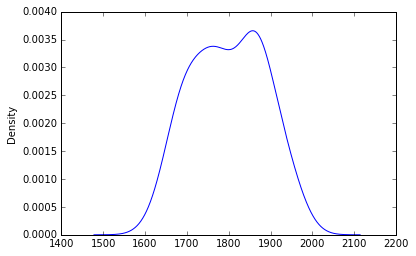

In [9]:
apple['PREMAX'].plot.kde()

In [8]:
#apple.plot(x=['DATA'], y=['PREMAX','PREULT','PREMIN'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state=42)

X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files (x86)\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [11]:
#svr = SVR(C=10.0, gamma=0.0048329302385717518, cache_size=1000)
svr = SVR(C=10.0, gamma=0.1, cache_size=1000)
svr

SVR(C=10.0, cache_size=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [12]:
svr.fit(X_train, y_train)

SVR(C=10.0, cache_size=1000, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [13]:
res = svr.predict(X_test)
res

array([-1.1389955 ,  0.70030876,  0.70350761, -1.1968749 , -0.10216178,
       -0.99614356,  0.70460717, -0.39779904,  0.5061633 ,  1.39980042,
       -0.39067674,  0.89688659,  0.65480898,  0.10859766, -0.26642168,
       -0.95458799, -1.19565969, -1.46144986,  0.59172532, -0.79992391,
       -1.36029157,  0.86148526,  0.89510087,  1.67684285,  0.78290143,
        0.78418487, -0.04862518])

In [14]:
res = pd.Series(y_scaler.inverse_transform(res))
res

0     1711.353383
1     1856.388157
2     1856.640397
3     1706.789415
4     1793.110897
5     1722.617696
6     1856.727100
7     1769.798994
8     1841.079193
9     1911.545217
10    1770.360609
11    1871.888922
12    1852.800360
13    1809.729925
14    1780.158501
15    1725.894480
16    1706.885237
17    1685.926869
18    1847.826021
19    1738.090216
20    1693.903510
21    1869.097418
22    1871.748112
23    1933.390862
24    1862.900842
25    1863.002046
26    1797.332422
dtype: float64

In [15]:
mean_absolute_error(y_test,res) # Objective is to lower this error value

y_inv = pd.Series(y_scaler.inverse_transform(y_test))

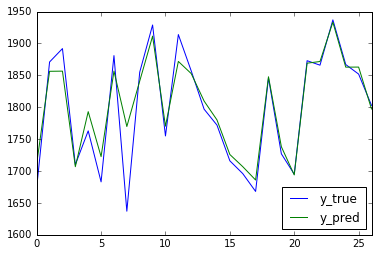

In [16]:
test = pd.DataFrame(data=[y_inv, res]).T
test.columns = ['y_true', 'y_pred']
test.plot()

In [16]:
rate_param = np.logspace(-1,1,num=20,base=10.0)
gamma = np.logspace(-5,-2,num=20,base=10.0)
#tuned_parameters = [{'alpha': rate_param, 'loss': ['huber','squared_loss'], 'penalty': ['l1','l2']}]
#tuned_parameters = [{'epsilon': rate_param}]
tuned_parameters = [{'C': rate_param, 'gamma': gamma}]

scores = ['neg_mean_absolute_error']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()   

    gscv = GridSearchCV(svr, tuned_parameters, cv=5, scoring='%s' % score)
    #gscv = GridSearchCV(svr, tuned_parameters, cv=5, scoring='%s' % score)
    gscv.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gscv.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gscv.cv_results_['mean_test_score']
    stds = gscv.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed regression report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    
    y_true, y_pred = y_test, gscv.predict(X_test)
    
    print(mean_absolute_error(y_true,y_pred))
    print()

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'C': 10.0, 'gamma': 0.0069519279617756054}

Grid scores on development set:

-0.827 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 1.0000000000000001e-05}
-0.827 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 1.4384498882876629e-05}
-0.827 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 2.06913808111479e-05}
-0.827 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 2.9763514416313192e-05}
-0.827 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 4.2813323987193957e-05}
-0.827 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 6.1584821106602672e-05}
-0.826 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 8.8586679041008327e-05}
-0.826 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 0.00012742749857031334}
-0.825 (+/-0.414) for {'C': 0.10000000000000001, 'gamma': 0.00018329807108324357}
-0.825 (+/-0.413) for {'C': 0.10000000000000001, 'gamma': 0.00026366508987303583}
-0

In [17]:
df_test = pd.read_csv("C:\Users\pedro.matos.castanha\Downloads\COTAHIST_D06012017\COTAHIST_D24012017.csv", low_memory=False)
df_test.head()

,TIPREG,DATA,CODBDI,CODNEG,TPMERC,NOMRES,ESPECI,PRAZOT,MODREF,PREABE,...,TOTNEG,QUATOT,VOLTOT,PREEXE,INDOPC,DATVEN,FATCOT,PTOEXE,CODISI,DISMES
0,1,20170124,2.0,AALR3,1,0ALLIAR,ON NM,NaN,R$,1439.0,...,522.0,163700.0,235919900.0,0.0,0.0,99991231.0,1.0,0.0,BRAALRACNOR6,100.0
1,1,20170124,96.0,AALR3F,2,0ALLIAR,ON NM,NaN,R$,1446.0,...,6.0,40.0,57735.0,0.0,0.0,99991231.0,1.0,0.0,BRAALRACNOR6,100.0
2,1,20170124,2.0,AAPL34,1,0APPLE,DRN,NaN,R$,3783.0,...,7.0,4800.0,18256600.0,0.0,0.0,99991231.0,1.0,0.0,BRAAPLBDR004,119.0
3,1,20170124,96.0,AAPL34F,2,0APPLE,DRN,NaN,R$,3783.0,...,3.0,158.0,601732.0,0.0,0.0,99991231.0,1.0,0.0,BRAAPLBDR004,119.0
4,1,20170124,10.0,ABCB2,1,0ABC BRASIL,DIR PRE N2,NaN,R$,513.0,...,96.0,38800.0,20461400.0,0.0,0.0,99991231.0,1.0,0.0,BRABCBD10PR0,126.0


In [18]:
dt = df_test[df_test.CODNEG == 'PETR3']
prd = dt.drop(labels=['PRAZOT', 'DATA', 'CODNEG','NOMRES', 'ESPECI', 'MODREF', 'CODISI', 'PREMAX'], axis=1).values
prd

array([[  1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.80000000e+03,   1.77300000e+03,   1.79700000e+03,
          1.77300000e+03,   1.77300000e+03,   1.77500000e+03,
          1.31860000e+04,   7.70620000e+06,   1.38550556e+10,
          0.00000000e+00,   0.00000000e+00,   9.99912310e+07,
          1.00000000e+00,   0.00000000e+00,   1.83000000e+02]])

In [19]:
prd_scal = X_scaler.transform(prd)
prd_scal

array([[ 0.        ,  0.        , -9.        ,  0.40157151,  0.57407374,
         0.47664315,  0.25560042,  0.27311966,  0.23768618, -0.42060937,
        -0.47530117, -0.46350227,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ]])

In [20]:
new_value = svr.predict(prd_scal)
y_scaler.inverse_transform(new_value)

array([ 1829.71692669])

In [22]:
df_test[df_test.CODNEG == 'PETR3']['PREMAX']

1295    1832.0
Name: PREMAX, dtype: float64

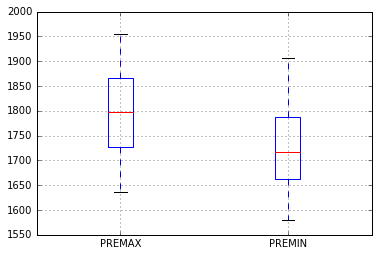

In [34]:
apple.boxplot(column=['PREMAX','PREMIN'])